# Testis 1 Explore Clusters

In [4]:
import os
import sys
from pathlib import Path
from itertools import zip_longest

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs, TSNEPlot
from larval_gonad.config import memory

# Setup notebook
nbconfig = Nb.setup_notebook('2018-03-27_testis1_explore_clusters', seurat_dir='../output/testis1_scRNAseq')

last updated: 2018-03-29 
Git hash: f801087de045aa9513181cc6ad771b9c12b12309


In [5]:
nbconfig._setup_plotting()

In [6]:
clusters = nbconfig.seurat.get_clusters()
tsne = nbconfig.seurat.get_tsne()
norm = nbconfig.seurat.get_normalized_read_counts()

In [7]:
_dat = clusters.join(tsne)

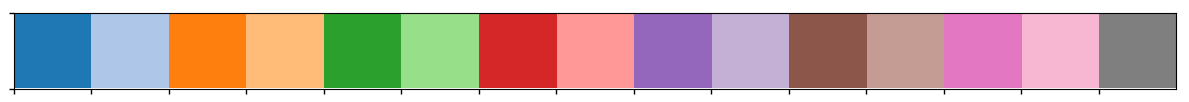

In [8]:
_colors = sns.color_palette('tab20', n_colors=15)
sns.palplot(_colors)

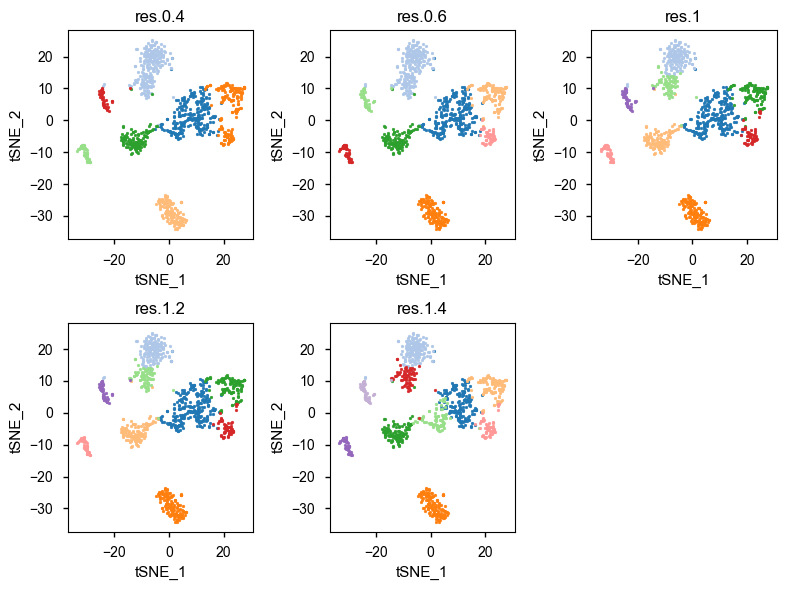

In [9]:
fig, axes = plt.subplots(2, 3)

for res, ax in zip_longest(clusters.columns, axes.flatten(), fillvalue=None):
    if res is None:
        ax.set_visible(False)
        continue
        
    TSNEPlot('tSNE_1', 'tSNE_2', _dat, 
             hue=res, palette=_colors,
             ax=ax, s=4
            )
    ax.legend_.remove()
    ax.set_title(res)
plt.tight_layout()

In [10]:
def _plot(gene, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    FBgn = nbconfig.symbol2fbgn[gene]
    TSNEPlot('tSNE_1', 'tSNE_2', tsne.join(norm.T[FBgn]), 
             hue=FBgn, cmap=sns.cubehelix_palette(rot=0, as_cmap=True), 
             vmin=0, vmax=2, ax=ax, **kwargs)
    ax.set_title(gene)

Text(0.5,1,'Testis 1')

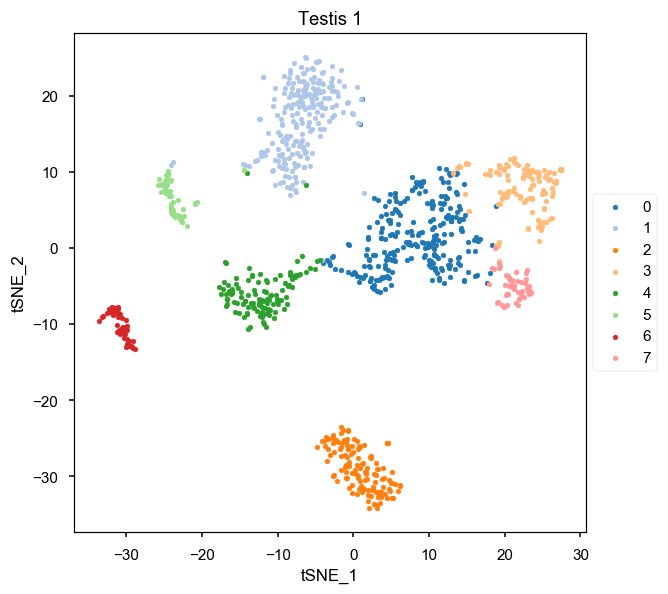

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=110)
TSNEPlot('tSNE_1', 'tSNE_2', _dat,  hue='res.0.6', palette=_colors, s=10, ax=ax)
ax.set_title('Testis 1')

In [12]:
biomarkers = pd.read_csv(Path(nbconfig.seurat_dir, 'biomarkers_0.6.tsv'), sep='\t', index_col=[0, 1, 'cluster'])

In [13]:
biomarkers = biomarkers.query('p_val_adj <= 0.0001')\
    .sort_values('avg_logFC')\
    .sort_index(level='cluster')\

In [14]:
soma = [
    'tj',
    'ImpL2',
    'fru',
    'foxo',
    'CadN',
    'crp',
    'Nrt',
    'bnb',
    'gbb',
    'Fas3',
    'tkv',
    'Egfr',
    'Lar',
    'Sox100B',
    'cora',
    'spict',
    'ems',
    'fax',
    'egr',
    'vkg',
    'spi',
    'oys',
    'dsx',
    'nord'
]

In [15]:
biomarkers.query(f'gene_symbol in {soma}')

,,,p_val,avg_logFC,pct.1,pct.2,p_val_adj
primary_FBgn,gene_symbol,cluster,,,,,
FBgn0001090,bnb,0,5.427720e-09,0.277491,0.439,0.244,6.344462e-05
FBgn0014163,fax,0,2.746070e-16,0.288917,0.996,0.712,3.209882e-12
FBgn0000464,Lar,2,2.650480e-16,0.479682,0.522,0.245,3.098146e-12
FBgn0000504,dsx,2,1.609173e-73,1.247937,0.866,0.217,1.880962e-69
FBgn0000636,Fas3,2,8.279274e-89,1.274054,0.694,0.062,9.677644e-85
FBgn0003716,tkv,2,4.157139e-23,0.502353,0.373,0.087,4.859280e-19
FBgn0003731,Egfr,2,4.285381e-57,0.896854,0.634,0.110,5.009182e-53
FBgn0024234,gbb,2,7.278639e-20,0.495715,0.500,0.187,8.508001e-16
FBgn0033483,egr,2,4.515419e-19,0.417642,0.336,0.077,5.278073e-15


In [16]:
early_germ = [
    'Phf7',
    'vas',
    'bam',
    'bgcn',
    'tut',
    'tej',
    'Rbp9',
    'hts',
    'mle',
    'Marf'
]

In [17]:
biomarkers.query(f'gene_symbol in {early_germ}')

,,,p_val,avg_logFC,pct.1,pct.2,p_val_adj
primary_FBgn,gene_symbol,cluster,,,,,
FBgn0000158,bam,5,6.463764e-115,0.521438,0.604,0.004,7.555494e-111
FBgn0002774,mle,5,6.968690e-35,0.778225,0.849,0.169,8.145702e-31
FBgn0004581,bgcn,5,2.123275e-72,0.547643,0.566,0.020,2.481896e-68
FBgn0010263,Rbp9,5,8.952928e-115,0.521121,0.698,0.012,1.046508e-110
FBgn0029870,Marf,5,1.559115e-09,0.304308,0.792,0.360,1.822450e-05
FBgn0031091,Phf7,5,1.964575e-108,1.105125,0.887,0.039,2.296391e-104
FBgn0033921,tej,5,3.802679e-102,0.310024,0.528,0.003,4.444951e-98
FBgn0052364,tut,5,3.188260e-67,0.402364,0.623,0.031,3.726757e-63
FBgn0263391,hts,5,4.478846e-34,1.031753,0.925,0.271,5.235323e-30


In [18]:
late_germ = [
    'aly',
    'mia',
    'CG3927',
    'sunz',
    'sowi',
    'soti',
    'c-cup',
    'd-cup',
    'wa-cup',
    'p-cup',
    'r-cup',
    'fzo',
]

In [19]:
biomarkers.query(f'gene_symbol in {late_germ}')

,,,p_val,avg_logFC,pct.1,pct.2,p_val_adj
primary_FBgn,gene_symbol,cluster,,,,,
FBgn0011596,fzo,4,3.722266e-47,0.488097,0.356,0.020,4.350956e-43
FBgn0014342,mia,4,1.371578e-47,0.607095,0.381,0.027,1.603237e-43
FBgn0031367,c-cup,4,7.201229e-130,1.388419,0.763,0.024,8.417517e-126
FBgn0034739,CG3927,4,2.683064e-119,1.426077,0.695,0.020,3.136234e-115
FBgn0037460,sowi,4,1.030247e-146,1.482990,0.915,0.043,1.204255e-142
FBgn0037462,sunz,4,1.260321e-101,0.917955,0.542,0.007,1.473189e-97
FBgn0037502,wa-cup,4,2.432754e-39,0.400507,0.280,0.014,2.843646e-35
FBgn0038089,d-cup,4,4.708036e-71,0.507336,0.390,0.006,5.503223e-67
FBgn0038225,soti,4,1.562231e-151,2.488312,0.983,0.061,1.826091e-147


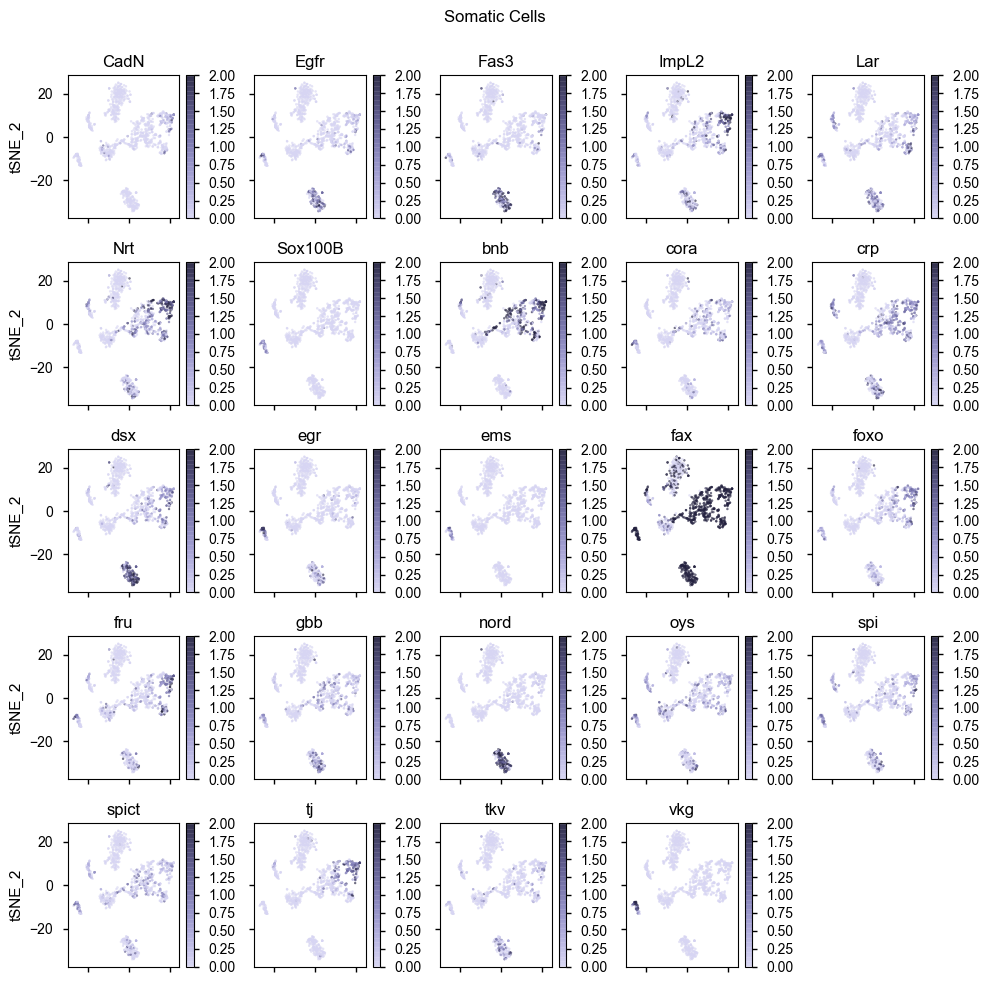

In [20]:
fig, axes = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(10, 10))

for gene, ax in zip_longest(sorted(soma), axes.flatten(), fillvalue=None):
    if gene is None:
        ax.set_visible(False)
        continue
    _plot(gene, ax, s=2, alpha=.6)
    
plt.suptitle('Somatic Cells')
plt.tight_layout(rect=[0, 0, 1, .95])

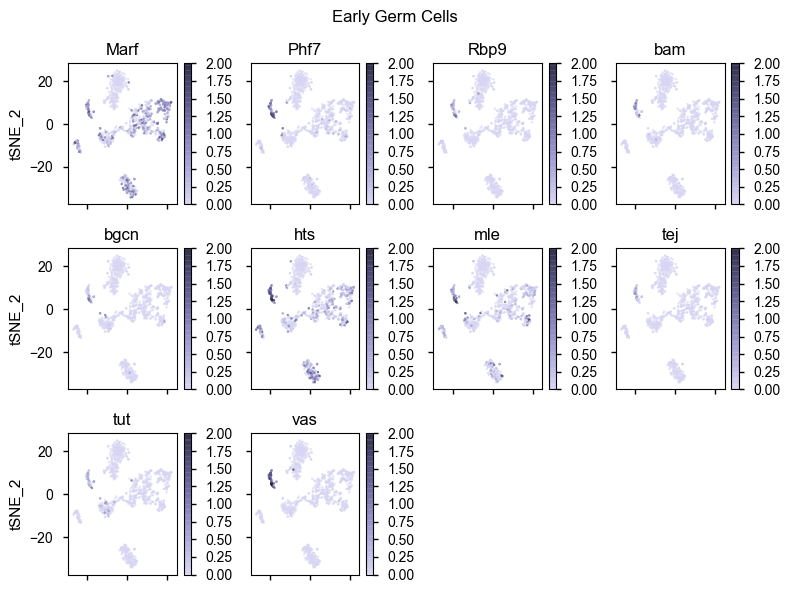

In [21]:
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True)

for gene, ax in zip_longest(sorted(early_germ), axes.flatten(), fillvalue=None):
    if gene is None:
        ax.set_visible(False)
        continue
    _plot(gene, ax, s=2, alpha=.6)
    
plt.suptitle('Early Germ Cells')
plt.tight_layout(rect=[0, 0, 1, .95])

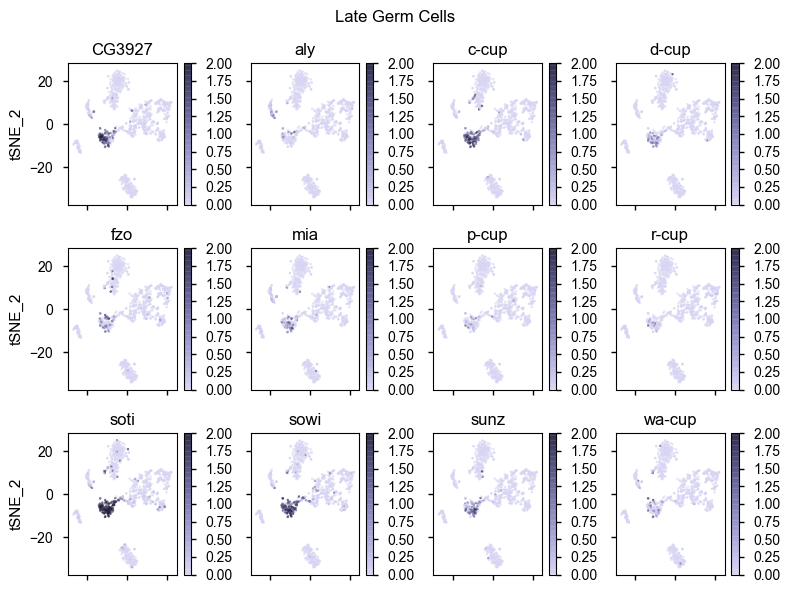

In [22]:
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True)

for gene, ax in zip_longest(sorted(late_germ), axes.flatten(), fillvalue=None):
    if gene is None:
        ax.set_visible(False)
        continue
    _plot(gene, ax, s=2, alpha=.6)
    
plt.suptitle('Late Germ Cells')
plt.tight_layout(rect=[0, 0, 1, .95])